In [1]:
%pylab inline 
from pymc3 import * 

Populating the interactive namespace from numpy and matplotlib


[ 0.5   0.25  0.25]
[ 0.5   0.25  0.25]
{'p_simplex': array([ 0.,  0.])}
{'p_simplex': array([-113.89917758,  -62.69917758])}
 [-----------------100%-----------------] 5000 of 5000 complete in 4.3 sec

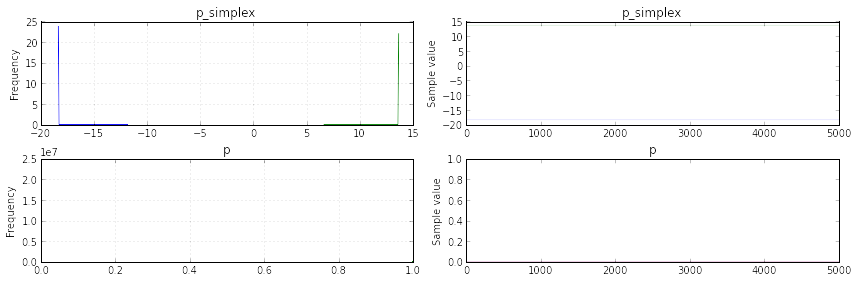

In [19]:
with Model() as model:
    
    a = np.array([.1,.1,.1])
    
    p = Dirichlet('p', a, shape=3)
    #c = Categorical('c', p, observed=[0,0,1,1,0,2])

    start = find_MAP()
    print model.test_point
    print (start)
    step = NUTS(model.vars)
    trace = sample(5000, step)
    
a = traceplot(trace)

In [7]:
trace[-1]

{'p': array([ 0.,  0.,  1.]),
 'p_simplex': array([ -3.87234445e+23,  -1.38063818e+22])}

In [ ]:


with Model() as model:
    k=3
    
    a = np.ones(k)*.5
    
    p = Dirichlet('p', a, shape=k, testval='mean')
    #c = Categorical('c', p, observed=[0,0,1,1,0,2])

    start = find_MAP()
    step = NUTS(model.vars, scaling=guess_scaling(start)*10)
    trace = sample(5000, step, start=start)
    
a = traceplot(trace)

In [ ]:
guess_scaling(trace[-1], model=model)

In [ ]:
step.Hbar

In [ ]:
start

In [ ]:
np.exp(-.097)

In [ ]:
with model:
    dlp = model.dlogp()
    
dlp(model.test_point)

In [ ]:
model.test_point

In [ ]:
find_hessian(model.test_point, model=model)

In [ ]:
model.test_point

In [13]:

def conditional_pdf(variable, index=None, start=None, model=None):
    model = modelcontext(model)
    if start is None: 
        start = model.test_point
    variable, = inputvars(variable)
    replace = {model[varname] : theano.tensor.as_tensor_variable(value) for varname, value in start.items() }
    x = theano.tensor.scalar('x0', dtype=variable.dtype)
    x.tag.test_value = start[str(variable)][index]
    replace[variable] = theano.tensor.set_subtensor(replace[variable][index], x)
    
    print (replace)

    logpt = theano.clone(model.logpt, replace, strict=False)
    print inputvars(logpt)
    return theano.function([x], logpt)




In [16]:
with model:
    f = conditional_pdf(p, 1, start=start)

{p_simplex: IncSubtensor{Set;int64}.0}
[x0]


In [18]:
start

{'p_simplex': array([-113.89917758,  -62.69917758])}

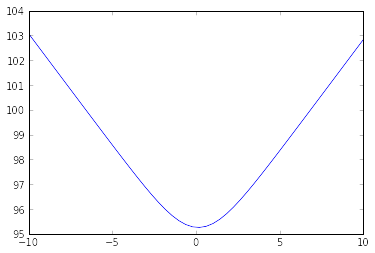

In [17]:
x = np.linspace(-10,10)
y = [f(v) for v in x]
plot(x,y)

In [ ]:
def logistic(x):
    return 1.0/(1+np.exp(-x))
logistic(np.array([0.08588418, -0.74669407]))

In [5]:
theano.tensor.extra_ops.cumprod([2,3,4,5]).tag.test_value

array([  2,   6,  24, 120])